# Exploratory Data Analysis: Walkthrough
Today we will be demonstrating the following key exploratory data analysis techniques using an example dataset:

**Agenda:**
1. Importing libraries & packages
2. Importing tabular data to a DataFrame
3. Inspecting DataFrame structure
4. Concatenation
5. Renaming Columns
6. Exploring values
7. Exporting DataFrames
8. Merging
9. Plotting



## The Data
Our example dataset is daily summaries of air quality data from Providence, RI. It will give you some experience with working with temporal data.

The Rhode Island Department of Environmental Management (RIDEM) and Rhode Island Department of Health (RIDOH) collects air quality data at several sites across Rhode Island. We will be examining data from one site at the Community of Rhode Island (CCRI) Liston Campus. Here's some background:

* The CCRI site is part of the EPA's *State or Local Air Monitoring Stations* (SLAMS) and *National Air Toxics Trends Sites* (NATTS) networks.
* A variety of air pollutants (particulate matter (PM), volatile organic carbon (VOCs),  polycyclic aromatic hydrocarbons (PAHs), carbonyls, black carbon) have been monitored at this site since 2005.
* A reference for some of the dataset's [field descriptions](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_daily_summary_files).
* The data was obtained from the Environmental Protection Agency (EPA) [Air Quality Data website](https://www.epa.gov/outdoor-air-quality-data).

<table><tr>
<td> <img src="images/aq-site-info.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="images/aq-site-table.png" alt="Drawing" style="width: 450px;"/> </td>
</tr></table>

![](./images/aq-site-gearth-dist.png)

We will use a subset of this data in the demonstrations below and give you a chance to work with a larger dataset during the hands-on lab.

*Links*

* [EPA Air Quality Data Interactive Map](https://www.epa.gov/outdoor-air-quality-data/interactive-map-air-quality-monitors) - Data source
* [RIDEM 2022 Annual Monitoring Report](https://dem.ri.gov/sites/g/files/xkgbur861/files/2023-01/airnet22.pdf) - More information about the site and other monitoring locations across the state.
* [National Air Toxics Tends Sites Quality Assurance Project Plan](https://www3.epa.gov/ttnamti1/files/ambient/airtox/NATTS-UATMP-PAMS-SNOC-Analytical-Support-QAPP-2019.pdf) - Detailed measurement guidelines for the toxins in this dataset
* [National Ambient Air Quality Standards](https://www.epa.gov/criteria-air-pollutants/naaqs-table)

---

## 1. Importing libraries & packages
Importing packages typically appears at the top of the file.
* `install.packages("<package_name>")` installs the package. Only needed once. We've set up the JupyterHub to include packages in our environment. So you'll likely only need the following to load your package.
* `library(<package_name>)` loads the package into your R session

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 2. Importing tabular data to a DataFrame
The pandas package reads tabular data into a data structure called a `DataFrame`. 

### Structure of a DataFrame
![series](./images/pandas_df.png)
Source: Edited from [geeksforgeeks.org](https://www.geeksforgeeks.org/python-pandas-dataframe/)

![series](./images/df_axes.jpeg)

Source: [stackoverflow](https://stackoverflow.com/questions/25773245/ambiguity-in-pandas-dataframe-numpy-array-axis-definition)


### You can read data from many types of formats:
* [`read_csv("path/to/your/file.csv")`](https://readr.tidyverse.org/reference/read_delim.html) - Comma-delimited or other delimited files
* Other common formats include Excel files, Text files, JSON files, SQL databases, and XML files. You'll need different packages and functions to import those formats.

We will be working with the `read_csv()` because our data is comma-delimited. This function defaults to read comma-delimited files, but can be used on any delimited text file when the seperator is specified.

A. To start we need specify the path to our data directory:
```
project
├── data
│   └── raw
│       └── monthly   <- Data is here
│
└── notebooks         <- Our working directory is here
```
We will be using `file.path` to create our directory path because it standardizes pathing between operating systems. Path separators are different between Unix (Mac & Linux; using `/`) and Windows (using `\`) operating systems. Avoiding full string paths makes the code universal.

In [2]:
# Create a path to the data directory. The `..` means go up one level from the current working directory
data_path <- file.path("..", "data")

## We extend the path to the monthly data directory
path_to_monthly_data = file.path(data_path, 'raw', 'monthly')

print(paste('This is the monthly data directory: ', path_to_monthly_data))

[1] "This is the monthly data directory:  ../data/raw/monthly"


Using the path generated above, we will read the first month of data (January 2022).

In [3]:
# Read and save the DataFrame object to a variable 'df_2022_01'
df_2022_01 <- read_csv(file.path(path_to_monthly_data, 'daily_44_007_0022_2022_01.csv'))

Rows: 743 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): Datum, Parameter Name, Duration Description, Pollutant Standard, ...
dbl  (14): State Code, County Code, Site Number, Parameter Code, POC, Latitu...
lgl   (5): Exceptional Data Type, Nonreg Observation Count, Nonreg Arithmeti...
date  (1): Date (Local)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(df_2022_01)

State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,⋯,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
44,7,22,87101,1,41.80747,-71.41297,NAD83,"Particle Number, Total Count",1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,61107,1,41.80747,-71.41297,NAD83,Std Dev Vt Wind Direction,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,62101,1,41.80747,-71.41297,NAD83,Outdoor Temperature,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,61104,1,41.80747,-71.41297,NAD83,Wind Direction - Resultant,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,84313,1,41.80747,-71.41297,NAD83,Black carbon PM2.5 STP,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,88101,3,41.80747,-71.41297,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,⋯,30,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart


## 3. Inspecting DataFrame Structure
Now that we have imported the data to a DataFrame. Some questions we are curious about:
1. Did it import correctly?
2. What does the table look like? Number of rows? Columns?
3. Do we need all the data we are importing?
4. Is the data in the correct format?

We can inspect the DataFrame object by looking at its **attributes** and using DataFrame **methods**.

Here are useful **attributes** of the dataframe
* `names`:  The names of the columns in the data frame
* `row.names`:  The names of the rows in the data frame
* `class`:  The class of the object, which is typically `data.frame` for data frames
* `dim`: The dimensions of the dataframe

Here are a few useful **methods** to inspect a dataframe:
* `str()`: Shows a listing of the variables and thier variable types
* `attributes()`: Shows a listing of attributes such as name, row.name, class, and dim
* `nrow()`: Shows the length of the data frame
* `ncol()`: Shows the number of columns in the data frame
* `head()`: Shows the first 6 rows of the data by default, but you can specify a different number of rows
* `tail()`: Shows the last 6 rows of the data by default, bur you can specify a different number of rows


In [5]:
# Let's take a look at the head of the data frame!
head(df_2022_01)

State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,⋯,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
44,7,22,87101,1,41.80747,-71.41297,NAD83,"Particle Number, Total Count",1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,61107,1,41.80747,-71.41297,NAD83,Std Dev Vt Wind Direction,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,62101,1,41.80747,-71.41297,NAD83,Outdoor Temperature,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,61104,1,41.80747,-71.41297,NAD83,Wind Direction - Resultant,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,84313,1,41.80747,-71.41297,NAD83,Black carbon PM2.5 STP,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,88101,3,41.80747,-71.41297,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,⋯,30,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart


In [6]:
# Let's take a look at the variables and thier variable types
str(df_2022_01)

spc_tbl_ [743 × 34] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ State Code                : num [1:743] 44 44 44 44 44 44 44 44 44 44 ...
 $ County Code               : num [1:743] 7 7 7 7 7 7 7 7 7 7 ...
 $ Site Number               : num [1:743] 22 22 22 22 22 22 22 22 22 22 ...
 $ Parameter Code            : num [1:743] 87101 61107 62101 61104 84313 ...
 $ POC                       : num [1:743] 1 1 1 1 1 3 3 3 1 1 ...
 $ Latitude                  : num [1:743] 41.8 41.8 41.8 41.8 41.8 ...
 $ Longitude                 : num [1:743] -71.4 -71.4 -71.4 -71.4 -71.4 ...
 $ Datum                     : chr [1:743] "NAD83" "NAD83" "NAD83" "NAD83" ...
 $ Parameter Name            : chr [1:743] "Particle Number, Total Count" "Std Dev Vt Wind Direction" "Outdoor Temperature" "Wind Direction - Resultant" ...
 $ Duration Description      : chr [1:743] "1 HOUR" "1 HOUR" "1 HOUR" "1 HOUR" ...
 $ Pollutant Standard        : chr [1:743] NA NA NA NA ...
 $ Date (Local)              : Date[1:743], form

<div class="alert alert-block alert-info">
Some observations:

This is a *long format* dataframe. Each row is composed of a date-parameter pair. See below, there are multiple parameters associated with the same date.

A *wide format* dataframe would have each row as a single date and measurements for each parameter would be in individual columns.
</div>



In [7]:
# Highlighting the long format by filtering the columns and getting the head of the data frame
long_data <- df_2022_01 %>% 
    select("Parameter Name", "Date (Local)", "Observation Count") %>%
    head()

long_data

Parameter Name,Date (Local),Observation Count
<chr>,<date>,<dbl>
"Particle Number, Total Count",2022-01-01,24
Std Dev Vt Wind Direction,2022-01-01,24
Outdoor Temperature,2022-01-01,24
Wind Direction - Resultant,2022-01-01,24
Black carbon PM2.5 STP,2022-01-01,24
PM2.5 - Local Conditions,2022-01-01,1


In [8]:
# This is what it would look like as wide data wherein each row is a single date and the measurement for each parameter is in individual columns
pivot_wider(long_data, names_from = "Parameter Name", values_from = "Observation Count")

Date (Local),"Particle Number, Total Count",Std Dev Vt Wind Direction,Outdoor Temperature,Wind Direction - Resultant,Black carbon PM2.5 STP,PM2.5 - Local Conditions
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-01-01,24,24,24,24,24,1


In [9]:
# Onwards to looking at the tail of the data
tail(df_2022_01)

State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,⋯,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
44,7,22,88101,3,41.80747,-71.41297,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,⋯,57,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,62201,1,41.80747,-71.41297,NAD83,Relative Humidity,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,84313,1,41.80747,-71.41297,NAD83,Black carbon PM2.5 STP,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,61107,1,41.80747,-71.41297,NAD83,Std Dev Vt Wind Direction,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,61103,1,41.80747,-71.41297,NAD83,Wind Speed - Resultant,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,61104,1,41.80747,-71.41297,NAD83,Wind Direction - Resultant,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart


In [10]:
# Let's get the dimensions
dim(df_2022_01)

[1] 743  34

In [11]:
# Column names
names(df_2022_01)

[1] "State Code"                 "County Code"               
 [3] "Site Number"                "Parameter Code"            
 [5] "POC"                        "Latitude"                  
 [7] "Longitude"                  "Datum"                     
 [9] "Parameter Name"             "Duration Description"      
[11] "Pollutant Standard"         "Date (Local)"              
[13] "Year"                       "Day In Year (Local)"       
[15] "Units of Measure"           "Exceptional Data Type"     
[17] "Nonreg Observation Count"   "Observation Count"         
[19] "Observation Percent"        "Nonreg Arithmetic Mean"    
[21] "Arithmetic Mean"            "Nonreg First Maximum Value"
[23] "First Maximum Value"        "First Maximum Hour"        
[25] "AQI"                        "Daily Criteria Indicator"  
[27] "Tribe Name"                 "State Name"                
[29] "County Name"                "City Name"                 
[31] "Local Site Name"            "Address"                   
[33] "MSA or CBSA Name"           "Data Source"

In [12]:
# Inspect Numerical Fields
df_2022_01 %>%
    select_if(is.numeric) %>%
    head(5)

State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Year,Day In Year (Local),Observation Count,Observation Percent,Arithmetic Mean,First Maximum Value,First Maximum Hour
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
44,7,22,87101,1,41.80747,-71.41297,2022,1,24,100,7062.208333,14300.00,17
44,7,22,61107,1,41.80747,-71.41297,2022,1,24,100,17.166667,25.00,7
44,7,22,62101,1,41.80747,-71.41297,2022,1,24,100,48.958333,54.00,15
44,7,22,61104,1,41.80747,-71.41297,2022,1,24,100,140.791667,195.00,15
44,7,22,84313,1,41.80747,-71.41297,2022,1,24,100,0.458333,1.25,1


In [13]:
# Inspect Character Fields
df_2022_01 %>%
    select_if(is.character) %>%
    head()

Datum,Parameter Name,Duration Description,Pollutant Standard,Units of Measure,AQI,Daily Criteria Indicator,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NAD83,"Particle Number, Total Count",1 HOUR,NA,Count per cm^3,.,Y,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
NAD83,Std Dev Vt Wind Direction,1 HOUR,NA,Degrees Compass,.,Y,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
NAD83,Outdoor Temperature,1 HOUR,NA,Degrees Fahrenheit,.,Y,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
NAD83,Wind Direction - Resultant,1 HOUR,NA,Degrees Compass,.,Y,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
NAD83,Black carbon PM2.5 STP,1 HOUR,NA,Micrograms/cubic meter (25 C),.,Y,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 Annual 2012,Micrograms/cubic meter (LC),30,Y,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart


**Back to our questions:**

1. Did it import correctly?
2. What does the table look like? Number of rows? Columns?
3. Do we need all the data we are importing?
4. Is the data in the correct format?

* There are many columns we could drop because they all have the same value such as: "Local Site Name" and "Address". We know we are only working with one site for this analysis so these columns don't provide much value. These columns are long string fields that take up more memory. Dropping them would improve performance if this dataset gets really large.
* The date would be more useful as a datetime data type rather than as string. This will allow for filtering by time and other useful datetime operations.
* The column names, while R converted them into valid variable names, are not in a more conventional format like snake case


In [14]:
install.packages('snakecase')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [15]:
library(snakecase)

In [16]:
# Clean up the column names
df_2022_01_curated <- df_2022_01 %>%
    rename_with(to_snake_case)

# Print out
head(df_2022_01_curated)
names(df_2022_01_curated)

state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter_name,duration_description,⋯,aqi,daily_criteria_indicator,tribe_name,state_name,county_name,city_name,local_site_name,address,msa_or_cbsa_name,data_source
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
44,7,22,87101,1,41.80747,-71.41297,NAD83,"Particle Number, Total Count",1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,61107,1,41.80747,-71.41297,NAD83,Std Dev Vt Wind Direction,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,62101,1,41.80747,-71.41297,NAD83,Outdoor Temperature,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,61104,1,41.80747,-71.41297,NAD83,Wind Direction - Resultant,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,84313,1,41.80747,-71.41297,NAD83,Black carbon PM2.5 STP,1 HOUR,⋯,.,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart
44,7,22,88101,3,41.80747,-71.41297,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,⋯,30,Y,NA,Rhode Island,Providence,Providence,CCRI Liston Campus ROOFTOP,"1 Hilton St, PROVIDENCE RI","Providence-Warwick, RI-MA",AQS Data Mart


[1] "state_code"                 "county_code"               
 [3] "site_number"                "parameter_code"            
 [5] "poc"                        "latitude"                  
 [7] "longitude"                  "datum"                     
 [9] "parameter_name"             "duration_description"      
[11] "pollutant_standard"         "date_local"                
[13] "year"                       "day_in_year_local"         
[15] "units_of_measure"           "exceptional_data_type"     
[17] "nonreg_observation_count"   "observation_count"         
[19] "observation_percent"        "nonreg_arithmetic_mean"    
[21] "arithmetic_mean"            "nonreg_first_maximum_value"
[23] "first_maximum_value"        "first_maximum_hour"        
[25] "aqi"                        "daily_criteria_indicator"  
[27] "tribe_name"                 "state_name"                
[29] "county_name"                "city_name"                 
[31] "local_site_name"            "address"                   
[33] "msa_or_cbsa_name"           "data_source"

In [17]:
# Create a list of the columns we wish to keep
keep_cols <- c(
    "parameter_code",
    "poc",
    "parameter_name",
    "duration_description",
    "pollutant_standard",
    "date_local",
    "year",
    "day_in_year_local",
    "units_of_measure",
    "exceptional_data_type",
    "observation_count",
    "observation_percent",
    "arithmetic_mean",
    "first_maximum_value",
    "first_maximum_hour",
    "aqi",
    "daily_criteria_indicator")

df_2022_01_curated <- df_2022_01_curated %>% select(all_of(keep_cols))
head(df_2022_01_curated)

parameter_code,poc,parameter_name,duration_description,pollutant_standard,date_local,year,day_in_year_local,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator
<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
87101,1,"Particle Number, Total Count",1 HOUR,NA,2022-01-01,2022,1,Count per cm^3,NA,24,100,7062.208333,14300.00,17,.,Y
61107,1,Std Dev Vt Wind Direction,1 HOUR,NA,2022-01-01,2022,1,Degrees Compass,NA,24,100,17.166667,25.00,7,.,Y
62101,1,Outdoor Temperature,1 HOUR,NA,2022-01-01,2022,1,Degrees Fahrenheit,NA,24,100,48.958333,54.00,15,.,Y
61104,1,Wind Direction - Resultant,1 HOUR,NA,2022-01-01,2022,1,Degrees Compass,NA,24,100,140.791667,195.00,15,.,Y
84313,1,Black carbon PM2.5 STP,1 HOUR,NA,2022-01-01,2022,1,Micrograms/cubic meter (25 C),NA,24,100,0.458333,1.25,1,.,Y
88101,3,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 Annual 2012,2022-01-01,2022,1,Micrograms/cubic meter (LC),NA,1,100,7.100000,7.10,0,30,Y


In [18]:
# Convert string date to Date field type
df_2022_01_curated <- df_2022_01_curated %>%
    mutate(date_local = as.Date(date_local, format = "%Y-%m-%d"))

# See the updated data type
head(df_2022_01_curated)

parameter_code,poc,parameter_name,duration_description,pollutant_standard,date_local,year,day_in_year_local,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator
<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
87101,1,"Particle Number, Total Count",1 HOUR,NA,2022-01-01,2022,1,Count per cm^3,NA,24,100,7062.208333,14300.00,17,.,Y
61107,1,Std Dev Vt Wind Direction,1 HOUR,NA,2022-01-01,2022,1,Degrees Compass,NA,24,100,17.166667,25.00,7,.,Y
62101,1,Outdoor Temperature,1 HOUR,NA,2022-01-01,2022,1,Degrees Fahrenheit,NA,24,100,48.958333,54.00,15,.,Y
61104,1,Wind Direction - Resultant,1 HOUR,NA,2022-01-01,2022,1,Degrees Compass,NA,24,100,140.791667,195.00,15,.,Y
84313,1,Black carbon PM2.5 STP,1 HOUR,NA,2022-01-01,2022,1,Micrograms/cubic meter (25 C),NA,24,100,0.458333,1.25,1,.,Y
88101,3,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 Annual 2012,2022-01-01,2022,1,Micrograms/cubic meter (LC),NA,1,100,7.100000,7.10,0,30,Y


In [19]:
str(df_2022_01_curated)

tibble [743 × 17] (S3: tbl_df/tbl/data.frame)
 $ parameter_code          : num [1:743] 87101 61107 62101 61104 84313 ...
 $ poc                     : num [1:743] 1 1 1 1 1 3 3 3 1 1 ...
 $ parameter_name          : chr [1:743] "Particle Number, Total Count" "Std Dev Vt Wind Direction" "Outdoor Temperature" "Wind Direction - Resultant" ...
 $ duration_description    : chr [1:743] "1 HOUR" "1 HOUR" "1 HOUR" "1 HOUR" ...
 $ pollutant_standard      : chr [1:743] NA NA NA NA ...
 $ date_local              : Date[1:743], format: "2022-01-01" "2022-01-01" ...
 $ year                    : num [1:743] 2022 2022 2022 2022 2022 ...
 $ day_in_year_local       : num [1:743] 1 1 1 1 1 1 1 1 1 2 ...
 $ units_of_measure        : chr [1:743] "Count per cm^3" "Degrees Compass" "Degrees Fahrenheit" "Degrees Compass" ...
 $ exceptional_data_type   : logi [1:743] NA NA NA NA NA NA ...
 $ observation_count       : num [1:743] 24 24 24 24 24 1 1 24 24 24 ...
 $ observation_percent     : num [1:743] 100 100 1

Great! We've cut down the number of columns and converted the date field to a datetime format!
Next lets see how we can add more data from other files.

## 4. Concatenation
So far we've worked with one month's worth of data. Let's see how we can combine DataFrames together.

We will be using the [`bind_rows`](https://dplyr.tidyverse.org/reference/bind.html) function to combine two or more DataFrames.


In [20]:
# Read in Feburary data
df_2022_02 <- read_csv(file.path(path_to_monthly_data, 'daily_44_007_0022_2022_02.csv'))

df_2022_02_curated <- df_2022_02 %>%
    rename_with(to_snake_case) %>%
    select(all_of(keep_cols)) %>%
    mutate(date_local = as.Date(date_local, format = "%Y-%m-%d"))
    
head(df_2022_02_curated)

Rows: 699 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): Datum, Parameter Name, Duration Description, Pollutant Standard, ...
dbl  (14): State Code, County Code, Site Number, Parameter Code, POC, Latitu...
lgl   (5): Exceptional Data Type, Nonreg Observation Count, Nonreg Arithmeti...
date  (1): Date (Local)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


parameter_code,poc,parameter_name,duration_description,pollutant_standard,date_local,year,day_in_year_local,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator
<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
61107,1,Std Dev Vt Wind Direction,1 HOUR,NA,2022-02-01,2022,32,Degrees Compass,NA,24,100,30.12500,44.0,17,.,Y
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-02-01,2022,32,Micrograms/cubic meter (LC),NA,12,50,18.33333,29.0,0,.,N
61104,1,Wind Direction - Resultant,1 HOUR,NA,2022-02-01,2022,32,Degrees Compass,NA,24,100,241.58333,357.0,12,.,Y
87101,1,"Particle Number, Total Count",1 HOUR,NA,2022-02-01,2022,32,Count per cm^3,NA,24,100,25241.33333,39175.0,7,.,Y
62101,1,Outdoor Temperature,1 HOUR,NA,2022-02-01,2022,32,Degrees Fahrenheit,NA,24,100,25.20833,34.0,13,.,Y
61103,1,Wind Speed - Resultant,1 HOUR,NA,2022-02-01,2022,32,Knots,NA,24,100,3.11250,4.4,14,.,Y


<div class="alert alert-block alert-info">
<b>Bind multiple data frames by row</b>

Bind any number of data frames by row, making a longer result. This is similar to do.call(rbind, dfs), but the output will contain all columns that appear in any of the inputs.

`bind_rows(..., .id=NULL)`

[Documentation Link](https://dplyr.tidyverse.org/reference/bind_rows.html)
</div>


In [21]:
# Concatenate
df_combined <- bind_rows(df_2022_01_curated, df_2022_02_curated)

In [22]:
# Observe dimensions
dim(df_2022_01_curated)
dim(df_2022_02_curated)
dim(df_combined)

[1] 743  17

[1] 699  17

[1] 1442   17

In [23]:
head(df_combined)
tail(df_combined)

parameter_code,poc,parameter_name,duration_description,pollutant_standard,date_local,year,day_in_year_local,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator
<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
87101,1,"Particle Number, Total Count",1 HOUR,NA,2022-01-01,2022,1,Count per cm^3,NA,24,100,7062.208333,14300.00,17,.,Y
61107,1,Std Dev Vt Wind Direction,1 HOUR,NA,2022-01-01,2022,1,Degrees Compass,NA,24,100,17.166667,25.00,7,.,Y
62101,1,Outdoor Temperature,1 HOUR,NA,2022-01-01,2022,1,Degrees Fahrenheit,NA,24,100,48.958333,54.00,15,.,Y
61104,1,Wind Direction - Resultant,1 HOUR,NA,2022-01-01,2022,1,Degrees Compass,NA,24,100,140.791667,195.00,15,.,Y
84313,1,Black carbon PM2.5 STP,1 HOUR,NA,2022-01-01,2022,1,Micrograms/cubic meter (25 C),NA,24,100,0.458333,1.25,1,.,Y
88101,3,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 Annual 2012,2022-01-01,2022,1,Micrograms/cubic meter (LC),NA,1,100,7.100000,7.10,0,30,Y


parameter_code,poc,parameter_name,duration_description,pollutant_standard,date_local,year,day_in_year_local,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator
<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
43815,2,Ethylene dichloride,24 HOUR,NA,2022-02-28,2022,59,Parts per billion Carbon,NA,1,100,0.0,0.0,0,.,Y
43802,2,Dichloromethane,24 HOUR,NA,2022-02-28,2022,59,Parts per billion Carbon,NA,1,100,0.1,0.1,0,.,Y
43817,2,Tetrachloroethylene,24 HOUR,NA,2022-02-28,2022,59,Parts per billion Carbon,NA,1,100,0.0,0.0,0,.,Y
43824,2,Trichloroethylene,24 HOUR,NA,2022-02-28,2022,59,Parts per billion Carbon,NA,1,100,0.0,0.0,0,.,Y
45807,2,"1,4-Dichlorobenzene",24 HOUR,NA,2022-02-28,2022,59,Parts per billion Carbon,NA,1,100,0.0,0.0,0,.,Y
43372,2,Methyl tert-butyl ether,24 HOUR,NA,2022-02-28,2022,59,Parts per billion Carbon,NA,1,100,0.0,0.0,0,.,Y


### Concat all the files!
Now that we've learned how to concatenate files. Let's combine all the monthly data.
Doing it manually for each file would be cumbersome. So lets use a function!

We won't have time to walk through this function in detail, but we encourage you to take a look on your own time. It covers concepts of:
1) Defining a function with: arguments, defaults, and variable keyword arguments
2) Listing files in a directory
3) for loops
4) if/else constructs
5) What we just learned about reading csv and concatenation


In [24]:
#' Combine CSV Files
#'
#' Searches a directory for text files, imports as a data frame and concatenates
#' to a single data frame
#' 
#' @param path path to directory
#' @param prefix string prefix to search for
#' @param suffix string suffix to search for, option, default ".csv"
#'
#' @return dataFrame
#'
#' @examples
combine_csv_files <- function(path, prefix, suffix=".csv") {
    # List files in the directory
    list_files_in_path <- sort(list.files(path_to_monthly_data))

    # Initialize an empty list to store data frames
    list_df <- list()

    # Loop through files
    for (file in list_files_in_path) {
        # Check if the files starts with the prefix and ends with the suffix
        if (startsWith(file, prefix) && endsWith(file, suffix)) {
            # Read the CSV file
            temp_df <- read_csv(file.path(path, file))

            # Curate the data frame
            temp_df_curated <- temp_df %>%
                rename_with(to_snake_case) %>%
                select(all_of(keep_cols)) %>%
                mutate(date_local = as.Date(date_local, format = "%Y-%m-%d"))
            
            # Add to the list of data frames
            # When appending a data frame to a list, it needs to be wraped in `list()` to ensure
            # that is it treated as a single element within the list. Otherwise, R may try to 
            # append each column of data as separate elements
            list_df <- append(list_df, list(temp_df_curated))
        }
    }

    # Concatenate all of the data frames
    return(bind_rows(list_df))
}

In [25]:
# Use the function defined above
df_2022 <- combine_csv_files(path_to_monthly_data, prefix='daily_44_007_0022_2022_')

Rows: 743 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): Datum, Parameter Name, Duration Description, Pollutant Standard, ...
dbl  (14): State Code, County Code, Site Number, Parameter Code, POC, Latitu...
lgl   (5): Exceptional Data Type, Nonreg Observation Count, Nonreg Arithmeti...
date  (1): Date (Local)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 699 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): Datum, Parameter Name, Duration Description, Pollutant Standard, ...
dbl  (14): State Code, County Code, Site Number, Parameter Code, POC, Latitu...
lgl   (5): Exceptional Data Type, Nonreg Observation Count, Nonreg Arithmeti...
date  (1): Date (Local)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specif

In [26]:
dim(df_2022)

[1] 8591   17

In [27]:
head(df_2022)

parameter_code,poc,parameter_name,duration_description,pollutant_standard,date_local,year,day_in_year_local,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator
<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
87101,1,"Particle Number, Total Count",1 HOUR,NA,2022-01-01,2022,1,Count per cm^3,NA,24,100,7062.208333,14300.00,17,.,Y
61107,1,Std Dev Vt Wind Direction,1 HOUR,NA,2022-01-01,2022,1,Degrees Compass,NA,24,100,17.166667,25.00,7,.,Y
62101,1,Outdoor Temperature,1 HOUR,NA,2022-01-01,2022,1,Degrees Fahrenheit,NA,24,100,48.958333,54.00,15,.,Y
61104,1,Wind Direction - Resultant,1 HOUR,NA,2022-01-01,2022,1,Degrees Compass,NA,24,100,140.791667,195.00,15,.,Y
84313,1,Black carbon PM2.5 STP,1 HOUR,NA,2022-01-01,2022,1,Micrograms/cubic meter (25 C),NA,24,100,0.458333,1.25,1,.,Y
88101,3,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 Annual 2012,2022-01-01,2022,1,Micrograms/cubic meter (LC),NA,1,100,7.100000,7.10,0,30,Y


In [28]:
tail(df_2022)

parameter_code,poc,parameter_name,duration_description,pollutant_standard,date_local,year,day_in_year_local,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator
<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
43826,2,"1,1-Dichloroethylene",24 HOUR,NA,2022-12-31,2022,365,Parts per billion Carbon,NA,1,100,0.00000,0.0,0,.,Y
43860,2,Vinyl chloride,24 HOUR,NA,2022-12-31,2022,365,Parts per billion Carbon,NA,1,100,0.00000,0.0,0,.,Y
43815,2,Ethylene dichloride,24 HOUR,NA,2022-12-31,2022,365,Parts per billion Carbon,NA,1,100,0.00000,0.0,0,.,Y
61107,1,Std Dev Vt Wind Direction,1 HOUR,NA,2022-12-31,2022,365,Degrees Compass,NA,24,100,17.16667,24.0,10,.,Y
43552,2,Methyl ethyl ketone,24 HOUR,NA,2022-12-31,2022,365,Parts per billion Carbon,NA,1,100,1.20000,1.2,0,.,Y
43372,2,Methyl tert-butyl ether,24 HOUR,NA,2022-12-31,2022,365,Parts per billion Carbon,NA,1,100,0.00000,0.0,0,.,Y


## 5. Renaming Columns
Before we jump into more detailed EDA we'll want to update the DataFrame to make our lives a bit easier. We'll be typing column names often to query the data so let's start by renaming the columns to a standard format.

* standard naming convention: snake_case
  * During our import, we have already converted the column names to snake_case using `rename_with(to_snake_case)`. 
* simplify complex names
  * We can reword some of the column names to make them more concise

In [29]:
# Column Names
colnames(df_2022)

[1] "parameter_code"           "poc"                     
 [3] "parameter_name"           "duration_description"    
 [5] "pollutant_standard"       "date_local"              
 [7] "year"                     "day_in_year_local"       
 [9] "units_of_measure"         "exceptional_data_type"   
[11] "observation_count"        "observation_percent"     
[13] "arithmetic_mean"          "first_maximum_value"     
[15] "first_maximum_hour"       "aqi"                     
[17] "daily_criteria_indicator"

There are two columns `date_local` and `day_in_year_local` that we can more concisely name as `date` and `day_in_year`. Let's use 

In [30]:
# Rename date_local to date
colnames(df_2022)[colnames(df_2022) == 'date_local'] <- 'date'

In [31]:
# Rename date_in_year_local to date_in_year
colnames(df_2022)[colnames(df_2022) == 'day_in_year_local'] <- 'day_in_year'

In [32]:
# Let's check! 
colnames(df_2022)

[1] "parameter_code"           "poc"                     
 [3] "parameter_name"           "duration_description"    
 [5] "pollutant_standard"       "date"                    
 [7] "year"                     "day_in_year"             
 [9] "units_of_measure"         "exceptional_data_type"   
[11] "observation_count"        "observation_percent"     
[13] "arithmetic_mean"          "first_maximum_value"     
[15] "first_maximum_hour"       "aqi"                     
[17] "daily_criteria_indicator"

Great! Now are column names are much more manageable.

## 6. Exploring Values
Let's start exploring the dataset.

Questions:
1. How complete is the data?
2. Are there duplicates?
3. How many parameters are measured?
4. How often are the parameters measured?
5. What are the descriptive stats of the numeral data?

We will cover the following topics:
1. Indexing
2. Checking for Nulls and Duplicates
3. Counts and Uniques
4. Querying
5. Descriptive Stats and groupby

### 6.1 Indexing
We often will need to look different slices of the dataframe.
* Slices are different groups of rows and/or columns.
* We perform indexing using brackets `[]`, similar to indexing lists.

```python
# For a single column
df_2022['parameter_name']

# For multiple columns, put column names into a vector
df_2022[c('parameter_name', 'date')]

# For a slice of rows (same as list indexing)
df_2022[5:10, ] # Note the comma. It indicates [rows, columns].

# For a slice of rows and columns
df_2022[5:10, c('parameter_name', 'parameter_code')]
```


In [33]:
df_2022[5:10, c('parameter_name', 'parameter_code')]

parameter_name,parameter_code
<chr>,<dbl>
Black carbon PM2.5 STP,84313
PM2.5 - Local Conditions,88101
PM2.5 - Local Conditions,88101
PM2.5 - Local Conditions,88101
Relative Humidity,62201
Black carbon PM2.5 STP,84313


### 6.2.0 Checking for Nulls
Nulls or NAs are values that represent no data or missing data.
* They are often represented as **NA** for "Not Available"
* The tidyverse readr package `read_csv` function fill NAs for blank values upon import.
* Be aware that scientific datasets often use large negative numbers outside of the normal range (like -999) to represent null data.

We can check for the number of null values quickly using the method `is.na()` and summing the results
* `is.na()` will create a boolean matrix and `colSum()` will sum by columns.


In [34]:
df_example <- data.frame(
    numbers = c(1, 2, 3, NA), 
    strings = c(NA, 'hello', 'world', NA)
)

df_example

numbers,strings
<dbl>,<chr>
1,NA
2,hello
3,world
NA,NA


In [35]:
# Example usage of is.na
df_example_na <- is.na(df_example)

df_example_na

numbers,strings
FALSE,TRUE
FALSE,FALSE
FALSE,FALSE
TRUE,TRUE


In [36]:
colSums(df_example_na)

numbers strings 
      1       2

In [37]:
# Now let's try our data
df_2022_na <- is.na(df_2022)
head(df_2022_na)

parameter_code,poc,parameter_name,duration_description,pollutant_standard,date,year,day_in_year,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [38]:
# Count
colSums(df_2022_na)

parameter_code                      poc           parameter_name 
                       0                        0                        0 
    duration_description       pollutant_standard                     date 
                       0                     7787                        0 
                    year              day_in_year         units_of_measure 
                       0                        0                        0 
   exceptional_data_type        observation_count      observation_percent 
                    8591                        0                        0 
         arithmetic_mean      first_maximum_value       first_maximum_hour 
                       0                        0                        0 
                     aqi daily_criteria_indicator 
                       0                        0

Luckily this dataset does not have missing data in important fields. The fields with null values make sense.
* Not all chemicals measured have a regulatory standard that would be in the **pollutant_standard** field, only the most toxic.
* **exceptional_data_type** is a flag field for anomalous conditions and events.

### 6.2.1 Handling missing data
Missing data is handled on a case-by-case basis. Some options are: 
* Drop missing data
    * If you have enough data otherwise   
* Impute data
    * Method will depend what data you have available
    * Some examples
        1. Extrapolate small gaps in a timeseries
        2. Use mean or median values from similar data points
        3. Sampling from a probability distribution



### 6.3 Checking for Duplicates
We use the [`duplicated()`](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/duplicated) method to check for duplicates.

The `duplicated()` method determines which elements of a vector or data frame are duplicates of elements with smaller subscripts, and returns a logical vector indicating which elements (rows) are duplicates.

Our intuition is that this dataset should have one record per day for each parameter. Let's check if that assumption is correct.

<div class="alert alert-block alert-warning">
NOTE:

The <b>duplicated()</b> method marks the <i>first</i> occurrence of each duplicate as FALSE and all subsequent duplicates as TRUE. This means that the first time a value appears, it is considered unique, and only the subsequent occurrences are flagged as duplicates.

To capture all of the duplicates including the first occurance, we'll use our logical operators and `fromLast` parameter which is indicated if duplication should be considered from the reverse side
</div>

In [39]:
# Grabbing just the date and parameter_code columns
df_2022_subset <- df_2022[, c('date', 'parameter_code')]

# Creating a boolean vector of ALL duplicates
mask_duplicates <- duplicated(df_2022_subset) | 
    duplicated(df_2022_subset, fromLast = TRUE)

mask_duplicates

[1] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE
  [25] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
  [37]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49]  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
  [73] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
 [109] FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [145]  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE
 [157] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [169]  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE
 [181] FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE
 [241] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [289]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
 [349] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [373]  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE
 [385]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [397] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [457]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [493]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALS

* We supplied the `duplicated()` method with the subset of columns to act as a unique key
* We also supplyed a keyword `fromLast = TRUE` and used an `|` OR logical operator
  * This logic is very confusing.
    * The default behavior of `duplicated()` is to make only duplicated after the the first occurance as 
      the duplicates.
    * This makes it easy to "keep" the first occurance and remove all subsequent duplicates. But, this 
      isn't the behavior we're trying to achieve at the moment.
    * First we capture the duplicates from the top-down `duplicated(df_2022_subset)`
    * And we capture all the duplicates from the bottom-up `duplicated(df_2022_subset, fromLast = TRUE)`. The `fromLast` parameter indicates if duplication should be considered from the reverse side.
    * We use the or operater to capture the union of the two duplicate vectors

In [40]:
any(mask_duplicates)

[1] TRUE

In [41]:
sum(mask_duplicates)

[1] 1855

OK. There are clearly some duplicates in this dataset. Let's take a closer look at these in the next section.

### 6.4 Querying and Sorting
By querying the dataframe we can better examine the duplicates we identified in the previous section.

There are two main ways to query a DataFrame:
1. Masking and Indexing
2. Using the dplyr package using the [`filter()`](https://dplyr.tidyverse.org/reference/filter.html) and [`select()`](https://dplyr.tidyverse.org/reference/select.html) method

The choice depends on preference and context.
* Masking and Indexing: involves creating a logical vector that you can use to subset your dataframe. It’s a straightforward method and can be very efficient for simple conditions.
* The `filter()` method is generally preferred for more complex data manipulation tasks

Syntax example:
```R
# Masking and Indexing
mask_param = df_2022$parameter_name == 'PM2.5 - Local Conditions'
df_2022[mask_param, ] # Mask the rows

# Filter Method
df_2022 %>%
    filter(parameter_name == 'PM2.5 - Local Conditions')
```

We just created a mask for duplicate values in the last section so let's try the filter method. We will also use the [`arrange()`](https://dplyr.tidyverse.org/reference/arrange.html) method to order the data frame.

In [42]:
# Using dplyr
duplicates <- df_2022 %>% 
    group_by(date, parameter_code) %>%
    filter(n() > 1) %>%
    ungroup()

In [43]:
# Comparing the using the mask and using dplyr
all.equal(df_2022[mask_duplicates, ], duplicates)

[1] TRUE

In [44]:
# Sort the duplicates by date and then parameter name and save that back to duplicates
duplicates <- duplicates %>%
    arrange('date', 'parameter_name')

In [45]:
# Investigate which parameters have duplicates
duplicates %>%
    group_by(parameter_name) %>%
    summarize(count = n())

parameter_name,count
<chr>,<int>
Acetaldehyde,58
Acetone,58
Antimony PM10 STP,60
Arsenic PM10 STP,60
Benzaldehyde,58
Beryllium PM10 STP,60
Cadmium PM10 STP,60
Chromium PM10 STP,60
Formaldehyde,58


The PM2.5 measurement seems to have something different going on than the other duplicates. Let's take a look at that parameter first.

In [46]:
df_2022 %>% 
    filter(parameter_name == 'PM2.5 - Local Conditions') %>%
    arrange(date, duration_description, pollutant_standard) %>%
    head(10)

parameter_code,poc,parameter_name,duration_description,pollutant_standard,date,year,day_in_year,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator
<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-01,2022,1,Micrograms/cubic meter (LC),NA,24,100,7.125000,38.0,0,.,Y
88101,3,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 24-hour 2012,2022-01-01,2022,1,Micrograms/cubic meter (LC),NA,1,100,7.100000,7.1,0,30,Y
88101,3,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 Annual 2012,2022-01-01,2022,1,Micrograms/cubic meter (LC),NA,1,100,7.100000,7.1,0,30,Y
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-02,2022,2,Micrograms/cubic meter (LC),NA,24,100,3.166667,7.0,16,.,Y
88101,3,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 24-hour 2012,2022-01-02,2022,2,Micrograms/cubic meter (LC),NA,1,100,3.100000,3.1,0,13,Y
88101,3,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 Annual 2012,2022-01-02,2022,2,Micrograms/cubic meter (LC),NA,1,100,3.100000,3.1,0,13,Y
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-03,2022,3,Micrograms/cubic meter (LC),NA,24,100,3.458333,6.0,22,.,Y
88101,3,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 24-hour 2012,2022-01-03,2022,3,Micrograms/cubic meter (LC),NA,1,100,3.400000,3.4,0,14,Y
88101,3,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 Annual 2012,2022-01-03,2022,3,Micrograms/cubic meter (LC),NA,1,100,3.400000,3.4,0,14,Y


*What do we notice about the PM2.5 measurement?*
* There are 3 records per day. They differ in duration_description and pollutant_standard.
* The "1 HOUR" duration seems to have the most accurate information for our purposes because it has more "arithmetic_mean" precision, and better information about the first maximum value and hour over the day.
* The "1 Hour" duration records does not have Air Quality Index "aqi" information

**Conclusion**
* We should keep only the "1 HOUR" duration and remove the others.
* We'll save the other durations in a separate DataFrame in the case we want the daily AQI information.

We can do this with querying!

In [47]:
df_2022_cleaned_v1 <- df_2022 %>%
    filter(!(parameter_name == 'PM2.5 - Local Conditions' & duration_description != '1 HOUR'))

In [48]:
df_2022_cleaned_v1 %>%
    filter(parameter_name == 'PM2.5 - Local Conditions') %>%
    head(10)

parameter_code,poc,parameter_name,duration_description,pollutant_standard,date,year,day_in_year,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator
<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-01,2022,1,Micrograms/cubic meter (LC),NA,24,100,7.125000,38,0,.,Y
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-02,2022,2,Micrograms/cubic meter (LC),NA,24,100,3.166667,7,16,.,Y
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-03,2022,3,Micrograms/cubic meter (LC),NA,24,100,3.458333,6,22,.,Y
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-04,2022,4,Micrograms/cubic meter (LC),NA,24,100,5.083333,9,0,.,Y
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-05,2022,5,Micrograms/cubic meter (LC),NA,24,100,5.958333,13,1,.,Y
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-06,2022,6,Micrograms/cubic meter (LC),NA,24,100,7.458333,13,5,.,Y
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-07,2022,7,Micrograms/cubic meter (LC),NA,24,100,7.041667,10,2,.,Y
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-08,2022,8,Micrograms/cubic meter (LC),NA,24,100,6.666667,20,21,.,Y
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-09,2022,9,Micrograms/cubic meter (LC),NA,24,100,7.041667,18,0,.,Y


Now let's return to look at those other duplicate parameters. Note that we are referencing the pre-cleaned dataframe.

In [49]:
duplicates %>%
    filter(parameter_name != 'PM2.5 - Local Conditions') %>%
    arrange(date, parameter_name) %>%
    head(10)

parameter_code,poc,parameter_name,duration_description,pollutant_standard,date,year,day_in_year,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator
<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
43503,7,Acetaldehyde,24 HOUR,NA,2022-01-05,2022,5,Parts per billion Carbon,NA,1,100,1.00,1.00,0,.,Y
43503,5,Acetaldehyde,24 HOUR,NA,2022-01-05,2022,5,Parts per billion Carbon,NA,1,100,0.90,0.90,0,.,Y
43551,7,Acetone,24 HOUR,NA,2022-01-05,2022,5,Parts per billion Carbon,NA,1,100,4.20,4.20,0,.,Y
43551,5,Acetone,24 HOUR,NA,2022-01-05,2022,5,Parts per billion Carbon,NA,1,100,3.80,3.80,0,.,Y
82102,2,Antimony PM10 STP,24 HOUR,NA,2022-01-05,2022,5,Nanograms/cubic meter (25 C),NA,1,100,0.84,0.84,0,.,Y
82102,1,Antimony PM10 STP,24 HOUR,NA,2022-01-05,2022,5,Nanograms/cubic meter (25 C),NA,1,100,0.82,0.82,0,.,Y
82103,2,Arsenic PM10 STP,24 HOUR,NA,2022-01-05,2022,5,Nanograms/cubic meter (25 C),NA,1,100,0.46,0.46,0,.,Y
82103,1,Arsenic PM10 STP,24 HOUR,NA,2022-01-05,2022,5,Nanograms/cubic meter (25 C),NA,1,100,0.46,0.46,0,.,Y
45501,7,Benzaldehyde,24 HOUR,NA,2022-01-05,2022,5,Parts per billion Carbon,NA,1,100,0.00,0.00,0,.,Y


*What do we notice here?*
* It appears these duplicates are pairs with a different 'poc' code.
    * The 'poc' code is an identifier for sampling instruments at the site. These parameters are sampled in replicates on separate instruments as a quality-control check. If replicate results differ too much, it may signal sampling error.
* At this point we have several options:
    1. Drop one of the duplicates
    2. Average the duplicates
    3. Leave the data alone

We'll choose option 3 for now because the duplicate treatment may depend on the type of analysis being performed. The decision can be made at that point.

### 6.5 Counts and Uniques
Counts and unique values are great for looking at categorical data.

In [50]:
# Get the count of unique values in each column
df_2022_cleaned_v1 %>%
    summarize(across(everything(), n_distinct))

parameter_code,poc,parameter_name,duration_description,pollutant_standard,date,year,day_in_year,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
92,6,92,2,2,365,1,365,9,1,17,16,2982,1378,24,21,2


In [51]:
# Get the counts of each parameter
counts <- df_2022_cleaned_v1 %>%
    count(parameter_name)
counts

parameter_name,n
<chr>,<int>
"1,1,1,2-Tetrachloroethane",56
"1,1,2,2-Tetrachloroethane",56
"1,1,2-Trichloroethane",56
"1,1-Dichloroethane",56
"1,1-Dichloroethylene",56
"1,2,4-Trichlorobenzene",56
"1,2,4-Trimethylbenzene",56
"1,2-Dichlorobenzene",56
"1,2-Dichloropropane",56


The output is abbreviated. To see specific analytes you need index with a list.

In [52]:
counts %>%
    filter(parameter_name %in% c(
        'PM2.5 - Local Conditions', 
        'Lead PM10 STP', 
        'Acetaldehyde', 
        'Cyclohexane'
    ))

parameter_name,n
<chr>,<int>
Acetaldehyde,88
Cyclohexane,56
Lead PM10 STP,91
PM2.5 - Local Conditions,355


### 6.5 Descriptive Stats and groupby
The method `summary()` is a great way to get descriptive statistics on numerical columns. When called on the dataframe, it will automatically provide statistics on each numerical column and countrs for factor columns.

In [53]:
summary(df_2022_cleaned_v1)

 parameter_code       poc        parameter_name     duration_description
 Min.   :17141   Min.   :1.000   Length:7905        Length:7905         
 1st Qu.:43801   1st Qu.:1.000   Class :character   Class :character    
 Median :45806   Median :2.000   Mode  :character   Mode  :character    
 Mean   :54772   Mean   :2.286                                          
 3rd Qu.:62201   3rd Qu.:2.000                                          
 Max.   :88101   Max.   :7.000                                          
 pollutant_standard      date                 year       day_in_year   
 Length:7905        Min.   :2022-01-01   Min.   :2022   Min.   :  1.0  
 Class :character   1st Qu.:2022-03-30   1st Qu.:2022   1st Qu.: 89.0  
 Mode  :character   Median :2022-06-28   Median :2022   Median :179.0  
                    Mean   :2022-06-30   Mean   :2022   Mean   :181.5  
                    3rd Qu.:2022-09-27   3rd Qu.:2022   3rd Qu.:270.0  
                    Max.   :2022-12-31   Max.   :2022   M

Though this isn't very useful for our dataset at the moment because it's creating statistics across 90+ parameters. It would be better to chunk the DataFrame by parameter and run summarise. This is where a powerful method called `group_by` is useful paired with `summarise()`.

In [54]:
df_gb_param_stats <- df_2022_cleaned_v1 %>%
    group_by(parameter_name) %>%
    summarise(
        count = n(),
        mean = mean(arithmetic_mean),
        std = sd(arithmetic_mean),
        min = min(arithmetic_mean),
        q1 = quantile(arithmetic_mean, 0.25),
        median = median(arithmetic_mean),
        q3 = quantile(arithmetic_mean, 0.75),
        max = max(arithmetic_mean)
    )
head(df_gb_param_stats)

parameter_name,count,mean,std,min,q1,median,q3,max
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"1,1,1,2-Tetrachloroethane",56,0.00000000,0.000000000,0,0.00,0.00,0.00,0.00
"1,1,2,2-Tetrachloroethane",56,0.00000000,0.000000000,0,0.00,0.00,0.00,0.00
"1,1,2-Trichloroethane",56,0.00000000,0.000000000,0,0.00,0.00,0.00,0.00
"1,1-Dichloroethane",56,0.00000000,0.000000000,0,0.00,0.00,0.00,0.00
"1,1-Dichloroethylene",56,0.00000000,0.000000000,0,0.00,0.00,0.00,0.00
"1,2,4-Trichlorobenzene",56,0.01357143,0.008618916,0,0.01,0.01,0.02,0.05


In [55]:
# To look at the PM2.5 stats
df_gb_param_stats %>%
    filter(parameter_name == 'PM2.5 - Local Conditions')

parameter_name,count,mean,std,min,q1,median,q3,max
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PM2.5 - Local Conditions,355,5.688474,2.916094,0.73913,3.625,4.958333,7.125,18.33333


You can `group_by()` multiple columns. Here's an example of sample counts by parameter and month.

In order to get the month, we need to reformat the date to get just the month. We'll do that with the `format()` function. See [How to Use Date Formats in R](https://www.geeksforgeeks.org/how-to-use-date-formats-in-r/)

In [56]:
# Group by parameter and by month
# To get the month, we need to format the date field
gb_param_month <- df_2022_cleaned_v1 %>%
    group_by(parameter_name, month = format(date, format = "%m"))

# Take a look to see if we grouped correctly
df_param_monthly_counts <- gb_param_month %>% count()
head(df_param_monthly_counts)

parameter_name,month,n
<chr>,<chr>,<int>
"1,1,1,2-Tetrachloroethane",01,5
"1,1,1,2-Tetrachloroethane",02,5
"1,1,1,2-Tetrachloroethane",03,5
"1,1,1,2-Tetrachloroethane",04,5
"1,1,1,2-Tetrachloroethane",05,5
"1,1,1,2-Tetrachloroethane",06,5


In [57]:
# View two specific parameters
df_param_monthly_counts %>%
    filter(parameter_name %in% c('PM2.5 - Local Conditions', '1,1,1,2-Tetrachloroethane')) %>%
    arrange(parameter_name, month)

parameter_name,month,n
<chr>,<chr>,<int>
"1,1,1,2-Tetrachloroethane",01,5
"1,1,1,2-Tetrachloroethane",02,5
"1,1,1,2-Tetrachloroethane",03,5
"1,1,1,2-Tetrachloroethane",04,5
"1,1,1,2-Tetrachloroethane",05,5
"1,1,1,2-Tetrachloroethane",06,5
"1,1,1,2-Tetrachloroethane",07,4
"1,1,1,2-Tetrachloroethane",08,4
"1,1,1,2-Tetrachloroethane",09,5


We can see that the frequency of sampling between these parameters is different.

Previously we found that some parameters had duplicate values. We can use groupby to average and count the values.

In [58]:
gb_param_date <- df_2022_cleaned_v1 %>%
    group_by(parameter_name, date)

gb_param_date %>%
    summarize(
        mean = mean(arithmetic_mean),
        count = n()
    ) %>%
    filter(count > 1)

`summarise()` has grouped output by 'parameter_name'. You can override using
the `.groups` argument.


parameter_name,date,mean,count
<chr>,<date>,<dbl>,<int>
Acetaldehyde,2022-01-05,0.95,2
Acetaldehyde,2022-01-17,0.90,2
Acetaldehyde,2022-01-29,0.85,2
Acetaldehyde,2022-02-10,1.15,2
Acetaldehyde,2022-02-22,1.10,2
Acetaldehyde,2022-03-06,0.95,2
Acetaldehyde,2022-03-18,1.65,2
Acetaldehyde,2022-03-30,0.85,2
Acetaldehyde,2022-04-11,0.85,2


## 7. Exporting DataFrames
We made some interesting groupby tables with summary stats in the last section. Let's try exporting them so we can view in another application or import them in a future analysis.

We use the `write_csv()` method from the `readr` package (part of `tidyverse`) to export to csv.
See the [readr documentation](https://readr.tidyverse.org/reference/write_delim.html).

In [59]:
# Create a Path object to the reports folder
outputs_path <- file.path("..", "reports")

# We saved the groupby parameters and descriptive stats of the arithmetic mean to a DataFrame
# df_gb_param_stats

# Call the to_csv method on the dataframe specifying path and filename
write_csv(df_gb_param_stats, file.path(outputs_path, 'stats-arithmetic_mean-by-param.csv'))

Navigate to the reports directory and confirm that a file was written.

## 8. Merging
If we wanted to join two tables based on common key we would use the [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) method.

There is a file with parameter classes that categorizes the parameters. This might help us make sense of which parameters are related to each other. Let's join it to our dataframe!
```
project
├── data
│   └── raw
│       └── params_class.csv
```

In [60]:
df_param_classes <- read_csv(file.path(data_path, 'raw', 'params_class.csv'))

head(df_param_classes)

Rows: 93 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): parameter_name, param_class
dbl (1): parameter_code
lgl (1): tier1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


parameter_name,parameter_code,param_class,tier1
<chr>,<dbl>,<chr>,<lgl>
PM2.5 - Local Conditions,88101,particulate,FALSE
Black carbon PM2.5 STP,84313,particulate,FALSE
Wind Direction - Resultant,61104,physical,FALSE
Std Dev Vt Wind Direction,61107,physical,FALSE
Relative Humidity,62201,physical,FALSE
Outdoor Temperature,62101,physical,FALSE


This file has two new columns:
1. **param_class** - The parameter classification
2. **tier1** - A boolean field for EPA designated Tier 1 major risk toxins.
    * Note that this does not apply to particulate matter which are criteria pollutants but are not designated as toxins.

In [61]:
# Count of the number of parameters in each class
df_param_classes %>%
    count(param_class)

param_class,n
<chr>,<int>
carbonyl,5
metals,8
pah,20
particulate,4
physical,5
voc,51


In [62]:
# Query the 18 Tier 1 toxins
df_param_classes %>%
    filter(tier1 == TRUE)

parameter_name,parameter_code,param_class,tier1
<chr>,<dbl>,<chr>,<lgl>
Formaldehyde,43502,carbonyl,TRUE
Acetaldehyde,43503,carbonyl,TRUE
Cadmium PM10 STP,82110,metals,TRUE
Lead PM10 STP,82128,metals,TRUE
Manganese PM10 STP,82132,metals,TRUE
Nickel PM10 STP,82136,metals,TRUE
Arsenic PM10 STP,82103,metals,TRUE
Beryllium PM10 STP,82105,metals,TRUE
Vinyl chloride,43860,voc,TRUE


In [63]:
df_2022_cleaned_v2 <- df_2022_cleaned_v1 %>%
    left_join(df_param_classes, by='parameter_name')

head(df_2022_cleaned_v2)

parameter_code.x,poc,parameter_name,duration_description,pollutant_standard,date,year,day_in_year,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator,parameter_code.y,param_class,tier1
<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<lgl>
87101,1,"Particle Number, Total Count",1 HOUR,NA,2022-01-01,2022,1,Count per cm^3,NA,24,100,7062.208333,14300.00,17,.,Y,87101,particulate,FALSE
61107,1,Std Dev Vt Wind Direction,1 HOUR,NA,2022-01-01,2022,1,Degrees Compass,NA,24,100,17.166667,25.00,7,.,Y,61107,physical,FALSE
62101,1,Outdoor Temperature,1 HOUR,NA,2022-01-01,2022,1,Degrees Fahrenheit,NA,24,100,48.958333,54.00,15,.,Y,62101,physical,FALSE
61104,1,Wind Direction - Resultant,1 HOUR,NA,2022-01-01,2022,1,Degrees Compass,NA,24,100,140.791667,195.00,15,.,Y,61104,physical,FALSE
84313,1,Black carbon PM2.5 STP,1 HOUR,NA,2022-01-01,2022,1,Micrograms/cubic meter (25 C),NA,24,100,0.458333,1.25,1,.,Y,84313,particulate,FALSE
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-01,2022,1,Micrograms/cubic meter (LC),NA,24,100,7.125000,38.00,0,.,Y,88101,particulate,FALSE


We used a left-join here. This means that only keys from the left table matter in the join. Keys that are in the right table but not the left will not be joined. See [documentation on joins](https://dplyr.tidyverse.org/reference/mutate-joins.html) for more information

Notice that `parameter_name` is duplicated with an appended ".x" and ".y" because the column existed in both tables. You can prevent this by indexing only the columns you want to join. For now we are just going to drop and rename the columns for an example of the `select()` method and `rename()` method.

[documentation for select()](https://dplyr.tidyverse.org/reference/select.html)
[docurmentation for rename()](https://dplyr.tidyverse.org/reference/rename.html) 

In [64]:
df_2022_cleaned_v3 <- df_2022_cleaned_v2 %>%
    # removes the column using the -
    select(-parameter_code.y) %>%
    # rename new column = old column
    rename(parameter_code = parameter_code.x)

head(df_2022_cleaned_v3)

parameter_code,poc,parameter_name,duration_description,pollutant_standard,date,year,day_in_year,units_of_measure,exceptional_data_type,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator,param_class,tier1
<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>
87101,1,"Particle Number, Total Count",1 HOUR,NA,2022-01-01,2022,1,Count per cm^3,NA,24,100,7062.208333,14300.00,17,.,Y,particulate,FALSE
61107,1,Std Dev Vt Wind Direction,1 HOUR,NA,2022-01-01,2022,1,Degrees Compass,NA,24,100,17.166667,25.00,7,.,Y,physical,FALSE
62101,1,Outdoor Temperature,1 HOUR,NA,2022-01-01,2022,1,Degrees Fahrenheit,NA,24,100,48.958333,54.00,15,.,Y,physical,FALSE
61104,1,Wind Direction - Resultant,1 HOUR,NA,2022-01-01,2022,1,Degrees Compass,NA,24,100,140.791667,195.00,15,.,Y,physical,FALSE
84313,1,Black carbon PM2.5 STP,1 HOUR,NA,2022-01-01,2022,1,Micrograms/cubic meter (25 C),NA,24,100,0.458333,1.25,1,.,Y,particulate,FALSE
88101,3,PM2.5 - Local Conditions,1 HOUR,NA,2022-01-01,2022,1,Micrograms/cubic meter (LC),NA,24,100,7.125000,38.00,0,.,Y,particulate,FALSE


Great! Lets save a copy of our processed dataset to the processed directory of the data folder.
This is good practice so that future analysis can start from a cleaner version of the data.

In [65]:
write_csv(df_2022_cleaned_v3, file.path(data_path, 'processed', 'df_2022_processed.csv'))

## 9. Reshaping and Plotting

### Reshaping
Plotting will require many dataframe transformations to shape the dataframe into a plot-able structure.
* With timeseries data we typically want a structure where rows are a single date/time and plot values are along columns.

| Date | param1 | param_2 | ...   | param_n |
|-----|-------|-------|-------|-------|
| Date1 | value | value | value | value |
| Date2 | value | value | value | value |
| ... | value | value | value | value |

The [`pivot_wider()`](https://tidyr.tidyverse.org/reference/pivot_wider.html) function will help us reshape the table to this format.

`pivot_wider()` "widens" data, increasing the number of columns and decreasing the number of rows. The inverse transformation is pivot_longer().

`pivot_longer()` "lengthens" data, increasing the number of rows and decreasing the number of columns. The inverse transformation is pivot_wider()

We will only look at **particulate** matter for plotting as classified in `param_class`.

In [66]:
# Filter to just the particulates and columns we care about
df_particulate <- df_2022_cleaned_v3 %>%
    filter(param_class == 'particulate') %>%
    select(c(date, parameter_name, arithmetic_mean))

head(df_particulate)

date,parameter_name,arithmetic_mean
<date>,<chr>,<dbl>
2022-01-01,"Particle Number, Total Count",7062.208333
2022-01-01,Black carbon PM2.5 STP,0.458333
2022-01-01,PM2.5 - Local Conditions,7.125000
2022-01-02,Black carbon PM2.5 STP,0.320833
2022-01-02,PM2.5 - Local Conditions,3.166667
2022-01-02,"Particle Number, Total Count",4740.000000


In [67]:
df_particulate_pivot <- df_particulate %>%
    pivot_wider(
        names_from = parameter_name,
        values_from = arithmetic_mean,
    )

Warning message:
“Values from `arithmetic_mean` are not uniquely identified; output will contain
list-cols.
• Use `values_fn = list` to suppress this warning.
• Use `values_fn = {summary_fun}` to summarise duplicates.
• Use the following dplyr code to identify duplicates.
  {data} |>
  dplyr::summarise(n = dplyr::n(), .by = c(date, parameter_name)) |>
  dplyr::filter(n > 1L)”


So we got a warning. Don't panic, read the warning. R has some helpful notes

```
Warning message:
“Values from `arithmetic_mean` are not uniquely identified; output will contain
list-cols.
• Use `values_fn = list` to suppress this warning.
• Use `values_fn = {summary_fun}` to summarise duplicates.
• Use the following dplyr code to identify duplicates.
  {data} |>
  dplyr::summarise(n = dplyr::n(), .by = c(date, param_class, parameter_name))
  |>
  dplyr::filter(n > 1L)”
```

Looks like now, we need to make a decision on our duplicates. In this case, I'm choosing at add a new column `mean_arithmetic_mean` to be the average of the arithmetic_mean for each date and parameter pairing

In [68]:
# Add a column to df_particulate
df_particulate <- df_particulate %>% 
    group_by(date, parameter_name) %>%
    mutate(
        mean_arithmetic_mean = mean(arithmetic_mean)
    ) %>%
    ungroup()

In [69]:
# Explore the duplicate now
df_particulate %>%
    group_by(date, parameter_name) %>%
    mutate(n = n()) %>%
    filter(n > 1) %>%
    arrange(date) %>%
    head

date,parameter_name,arithmetic_mean,mean_arithmetic_mean,n
<date>,<chr>,<dbl>,<dbl>,<int>
2022-01-05,PM10 Total 0-10um STP,9,9.5,2
2022-01-05,PM10 Total 0-10um STP,10,9.5,2
2022-01-11,PM10 Total 0-10um STP,8,8.0,2
2022-01-11,PM10 Total 0-10um STP,8,8.0,2
2022-01-17,PM10 Total 0-10um STP,6,6.0,2
2022-01-17,PM10 Total 0-10um STP,6,6.0,2


In [70]:
df_particulate_unique <- df_particulate %>%
    distinct(date, parameter_name, mean_arithmetic_mean)

head(df_particulate_unique)

date,parameter_name,mean_arithmetic_mean
<date>,<chr>,<dbl>
2022-01-01,"Particle Number, Total Count",7062.208333
2022-01-01,Black carbon PM2.5 STP,0.458333
2022-01-01,PM2.5 - Local Conditions,7.125000
2022-01-02,Black carbon PM2.5 STP,0.320833
2022-01-02,PM2.5 - Local Conditions,3.166667
2022-01-02,"Particle Number, Total Count",4740.000000


In [71]:
# Let's try pivoting the data frame now

df_particulate_unique_pivot <- df_particulate_unique %>%
    pivot_wider(
        names_from = parameter_name,
        values_from = mean_arithmetic_mean, 
    )

head(df_particulate_unique_pivot)

date,"Particle Number, Total Count",Black carbon PM2.5 STP,PM2.5 - Local Conditions,PM10 Total 0-10um STP
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2022-01-01,7062.208,0.458333,7.125000,NA
2022-01-02,4740.000,0.320833,3.166667,NA
2022-01-03,8056.583,0.197917,3.458333,NA
2022-01-04,12463.609,0.290000,5.083333,NA
2022-01-05,12847.583,0.621250,5.958333,9.5
2022-01-06,8066.625,0.382917,7.458333,NA


In [72]:
# Some renames for convenience
df_pm <- df_particulate_unique

df_pm_pivot <- df_particulate_unique_pivot %>%
    rename(
        particle_number = "Particle Number, Total Count",
        black_carbon = "Black carbon PM2.5 STP",
        pm2_5 = "PM2.5 - Local Conditions",
        pm10 = "PM10 Total 0-10um STP"
    )

head(df_pm_pivot)

date,particle_number,black_carbon,pm2_5,pm10
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2022-01-01,7062.208,0.458333,7.125000,NA
2022-01-02,4740.000,0.320833,3.166667,NA
2022-01-03,8056.583,0.197917,3.458333,NA
2022-01-04,12463.609,0.290000,5.083333,NA
2022-01-05,12847.583,0.621250,5.958333,9.5
2022-01-06,8066.625,0.382917,7.458333,NA


Now we have a wide table with the index as dates and parameters as columns! Let's begin plotting!

### Plotting
1. Boxplots - Distribution and outliers
2. Time Series - Temporal trends
3. Scatter - Relationships between variables
4. Autocorrelation & Lag Plots - Relationships with previous measurements

Please check out [ggplot2's documentation](https://ggplot2.tidyverse.org/index.html) documentation for many more plot types.

In [73]:
library(ggplot2)

### 9.1 Boxplots
Boxplots can be generated with `geom_boxplot()`


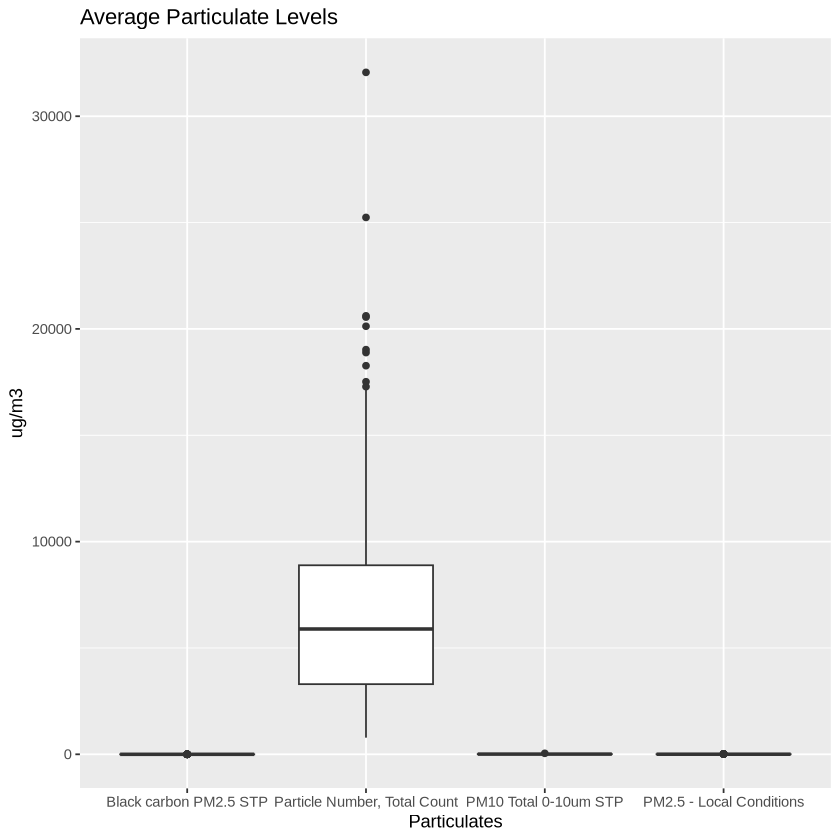

In [74]:
ggplot(
    df_pm, 
    aes(x = parameter_name, y = mean_arithmetic_mean)
) +
geom_boxplot() + 
labs(title = "Average Particulate Levels",
    x = "Particulates",
    y = 'ug/m3')

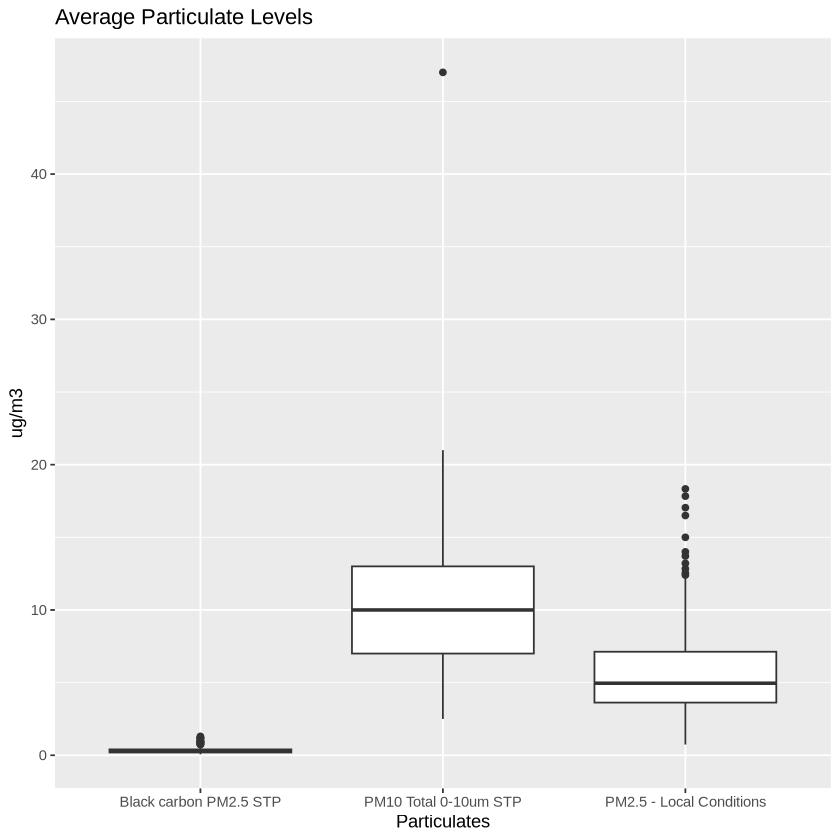

In [75]:
# Lets filter out the Particle Number parameter since because it's 
# a completely different measure and magnitude
ggplot(
    df_pm %>% filter(parameter_name != "Particle Number, Total Count"), 
    aes(x = parameter_name, y = mean_arithmetic_mean)
) +
geom_boxplot() + 
labs(title = "Average Particulate Levels",
    x = "Particulates",
    y = 'ug/m3')

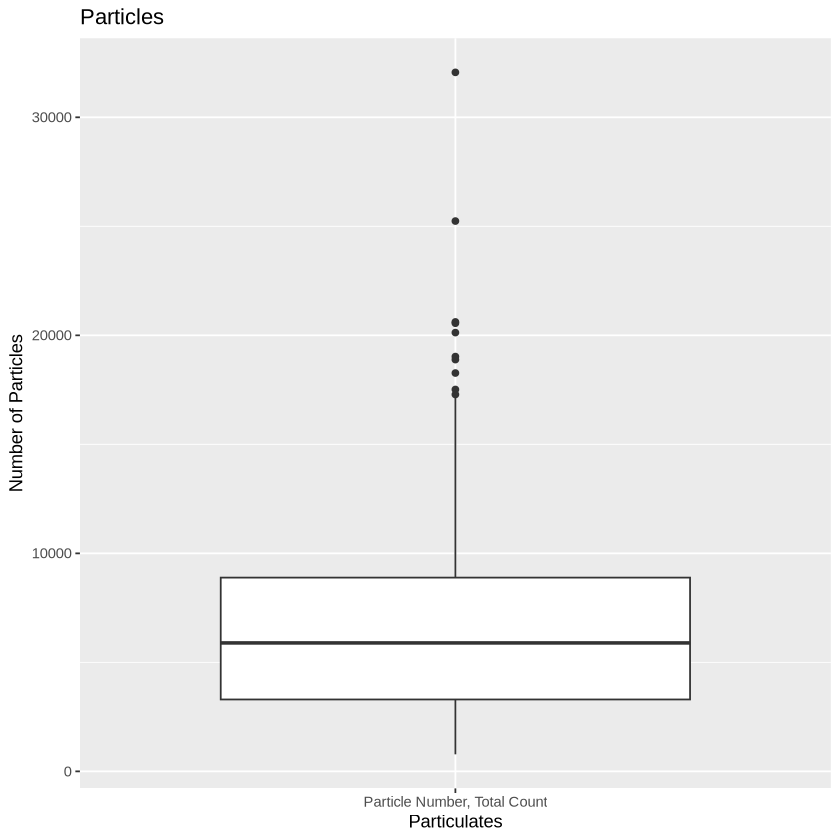

In [76]:
# And then here is the separate plot for particle number
ggplot(
    df_pm %>% filter(parameter_name == "Particle Number, Total Count"), 
    aes(x = parameter_name, y = mean_arithmetic_mean)
) +
geom_boxplot() + 
labs(title = "Particles",
    x = "Particulates",
    y = 'Number of Particles')

We should probably plot the parameters on their own panel due the differences in magnitude.

Seems like there are outliers that may be worth removing in future analysis.
Collecting more years of data could give us a better idea of these are true outliers.

### 9.2 Time Series
Time series are useful to look at temporal trends.
To plot a time series we simply call the method [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

Our dataframe's index is set to the date so the plot function will assume that as the x-axis.

In [77]:
head(df_pm)

date,parameter_name,mean_arithmetic_mean
<date>,<chr>,<dbl>
2022-01-01,"Particle Number, Total Count",7062.208333
2022-01-01,Black carbon PM2.5 STP,0.458333
2022-01-01,PM2.5 - Local Conditions,7.125000
2022-01-02,Black carbon PM2.5 STP,0.320833
2022-01-02,PM2.5 - Local Conditions,3.166667
2022-01-02,"Particle Number, Total Count",4740.000000


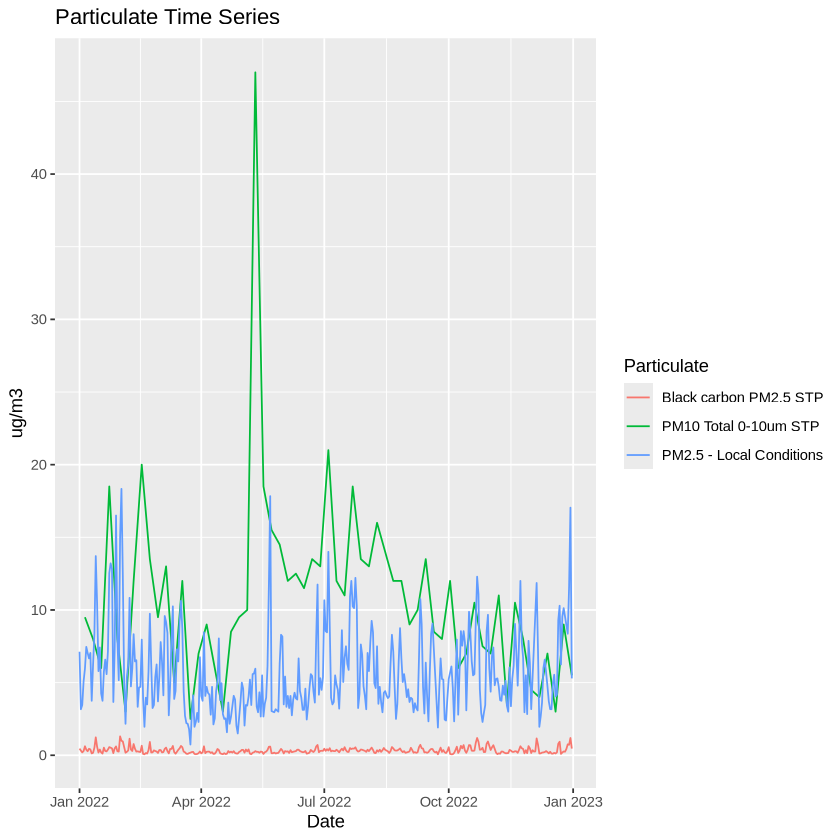

In [78]:
# Note: Notice that you can define an aes inside of a specific geom
# That means that those parameters are local to that geom rather than on the
# plot level if it was defined in the ggplot parameters

ggplot(
    df_pm %>% filter(parameter_name != "Particle Number, Total Count"),
    aes(x = date, y = mean_arithmetic_mean)
) +
geom_path(aes(colour = parameter_name)) + 
labs(title = "Particulate Time Series",
    x = "Date",
    y = "ug/m3",
    color = "Particulate")

Think about what scale you want the plot to be displayed. 
In this case, we'll switch to a log scale.

In [79]:
time_series <- ggplot(
    df_pm %>% filter(parameter_name != "Particle Number, Total Count"),
    aes(x = date, y = mean_arithmetic_mean)
) +
coord_trans(y = "log10") +
geom_path(aes(colour = parameter_name)) + 
labs(title = "Particulate Time Series",
    x = "Date",
    y = "ug/m3",
    color = "Particulate")

PM10 has a lot zof NaNs. In the above time series, the points are connected from when it was last seen. When you process data, you'll need to think about whether that behavior is desireable or if you would like to do something else such as more smoothing. 

According to the US Environmental Policy Agency (EPA), the National Ambient Air Quality Standards (NAAQS) for 2.5 PM is 9.0 micrograms per cubic meter to provide increased public health protection, consistent with the available health science.

Let's add that to our plot

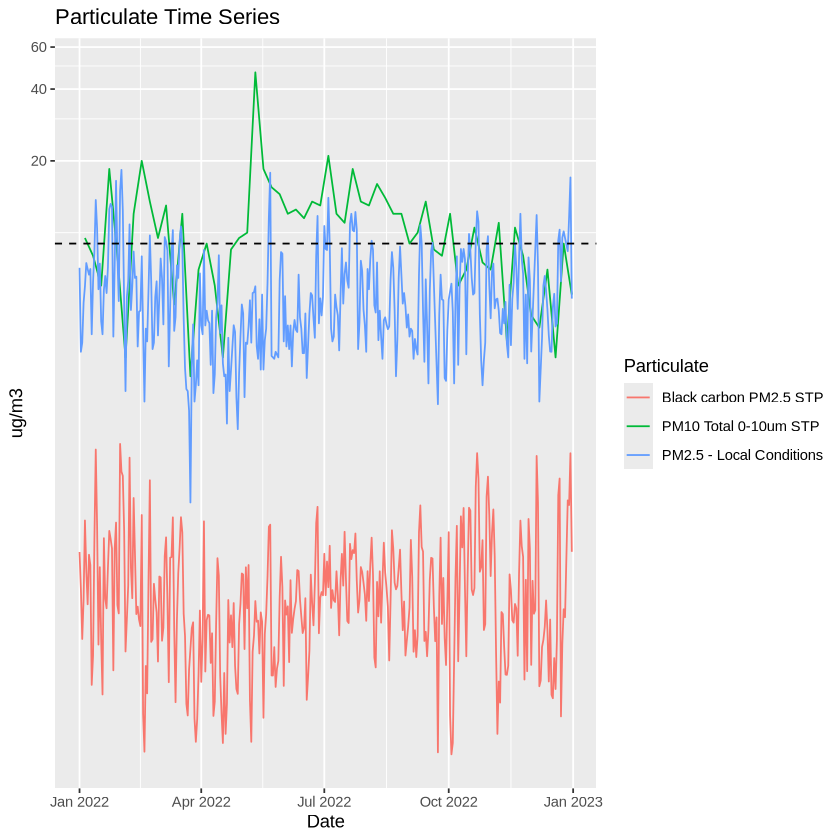

In [80]:
time_series <- time_series + 
    geom_hline(yintercept=9, linetype="dashed", color = "black")

time_series

Environmental data can be noisy. Applying a rollmean mean is a technique to smooth-out noise and look at underlying trends.
We use the [`rolling()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) method to the DataFrame to calculate this.

In [81]:
library(zoo)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_line()`).”


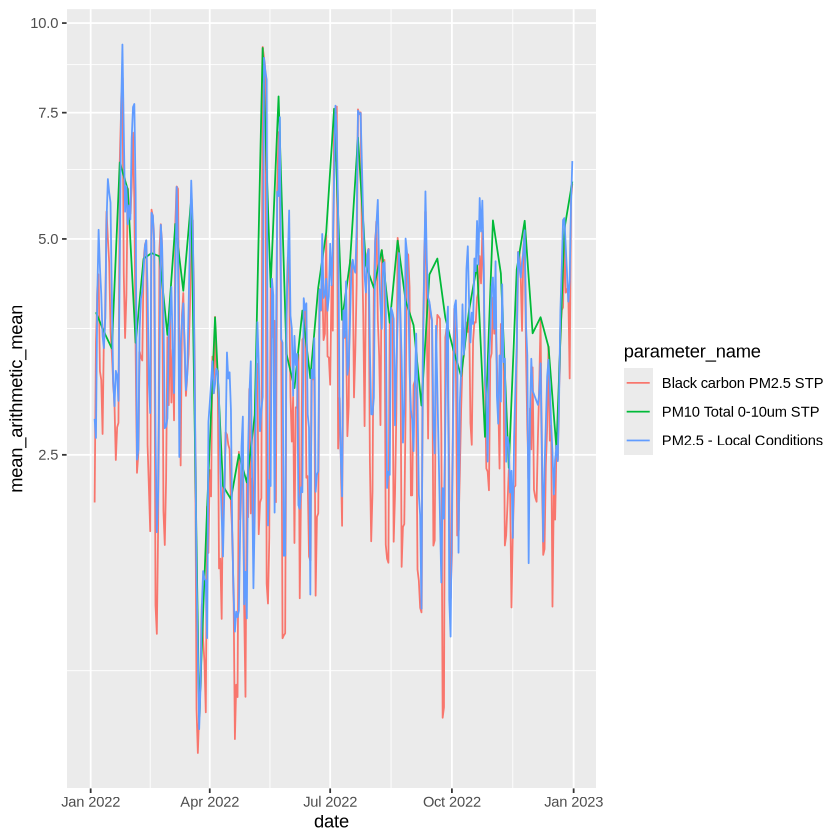

In [83]:
# Try adjusting the roll mean!
ggplot(
    df_pm %>% filter(parameter_name != "Particle Number, Total Count"),
    aes(x = date, y = mean_arithmetic_mean)
) +
coord_trans(y = "log10") +
geom_line(aes(
    x = date,
    y = rollmean(mean_arithmetic_mean, 7, align = "right", fill = NA),
    color = parameter_name,
))

* There's not enough data to compute a rolling average for PM10.
* Black carbon and PM2.5 seem paired. This makes sense because Black carbon PM2.5 is a subset of PM2.5.
* There seems to be some temporal trends.

### 9.3 Scatter
Scatter plots help determine relationship between two variables.
Let's plot a scatter plot between PM2.5 and Black Carbon. We can specify this with the [`geom_point()`](https://ggplot2.tidyverse.org/reference/geom_point.html) method.

In [82]:
names(df_pm_pivot)

[1] "date"            "particle_number" "black_carbon"    "pm2_5"          
[5] "pm10"

Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`).”


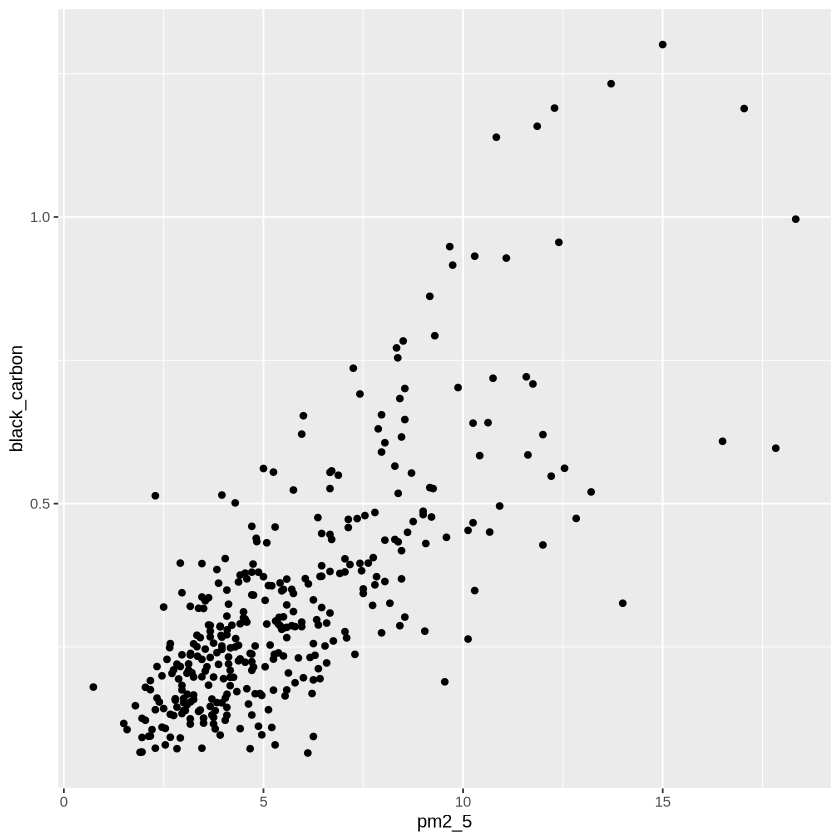

In [84]:
ggplot(
    df_pm_pivot,
    aes(x=pm2_5, y=black_carbon)
) +
geom_point()

In [88]:
install.packages("GGally")

also installing the dependency ‘ggstats’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [89]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



A [`scatterplot matrix`](https://plotly.com/ggplot2/splom/) is a quick method to look at relationships between all parameters simultaneously.

Take a look at the documentation for [`ggpairs`](https://ggobi.github.io/ggally/reference/ggpairs.html) which is part of the `GGally` package that is an extension on `ggplot2`

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 24 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 10 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 304 rows containing missing values”
Warning message:
“Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 24 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 24 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 34 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 309 rows containing missing values”
Warning me

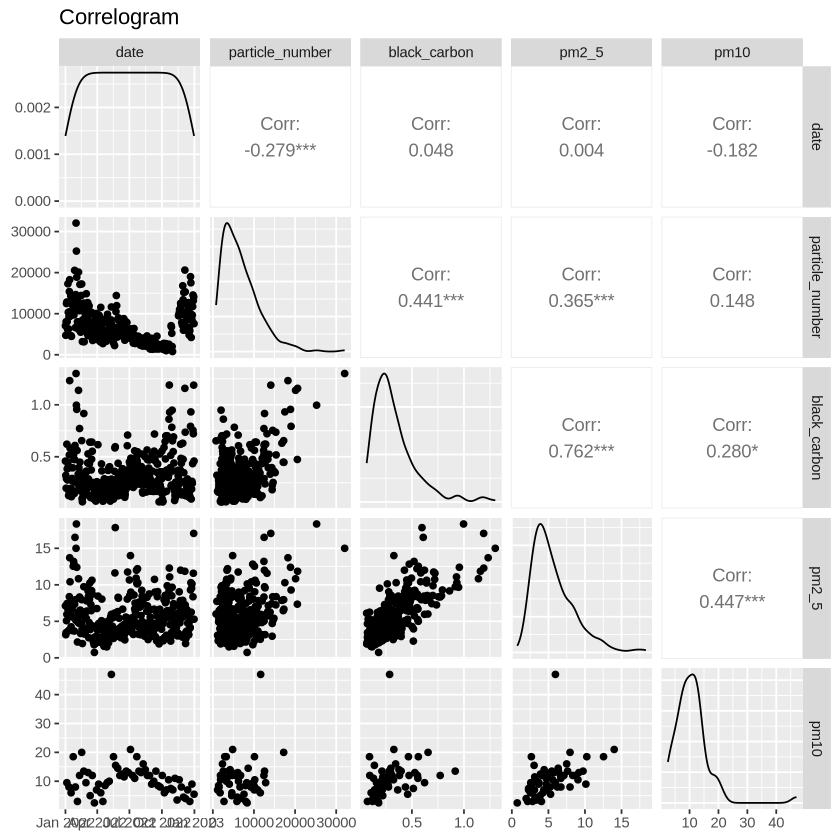

In [94]:
ggpairs(df_pm_pivot, title="Correlogram")

We can see that the parameters are generally positively correlated.

### 9.4 Autocorrelation & Lag Plots
Autocorrelation and lag plots help us determine if there are relationship with a measurement and previous measurements (lags).
Autocorrelation can find periodic trends in the data like seasonality.

In [102]:
# Documentation: https://pkg.robjhyndman.com/forecast/reference/autoplot.acf.html
library(forecast)

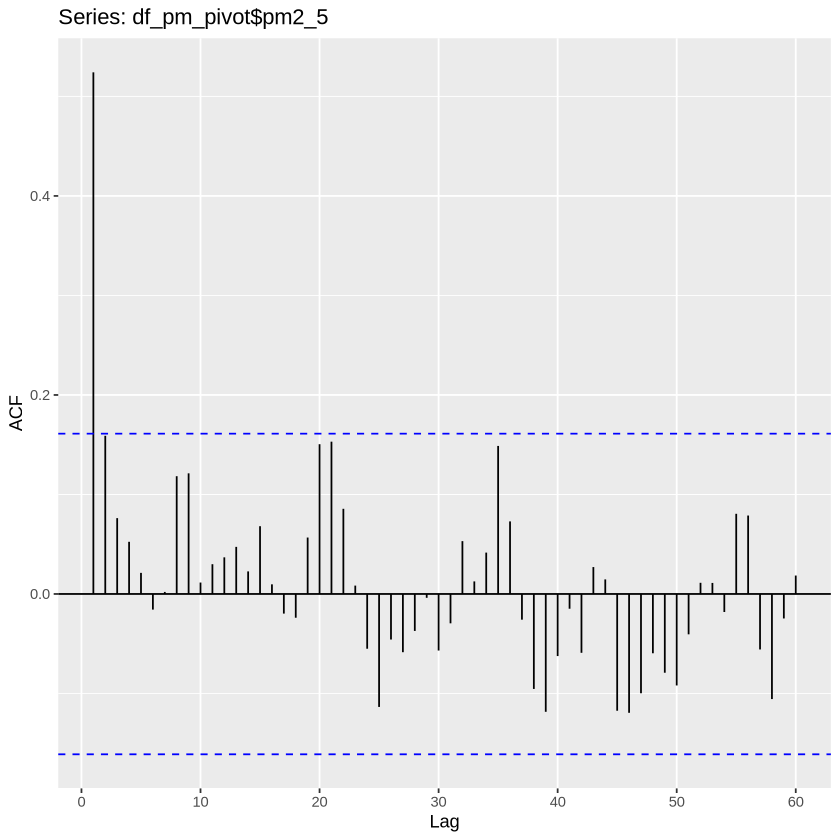

In [109]:
# Autocorrelation Function (ACF) for 2 months
ggAcf(df_pm_pivot$pm2_5, lag.max=60)

The horizontal lines correspond to the 95 confidence bands. When the line is outside the bands the correlation is more confidently non-zero. The lags represent days. There is a steep drop-off in correlation after the first day.

In [ ]:
You can use this to take a look at seasonality and periodicities (periodic trends)

Warning message:
“Removed 104 rows containing missing values or values outside the scale range
(`geom_point()`).”


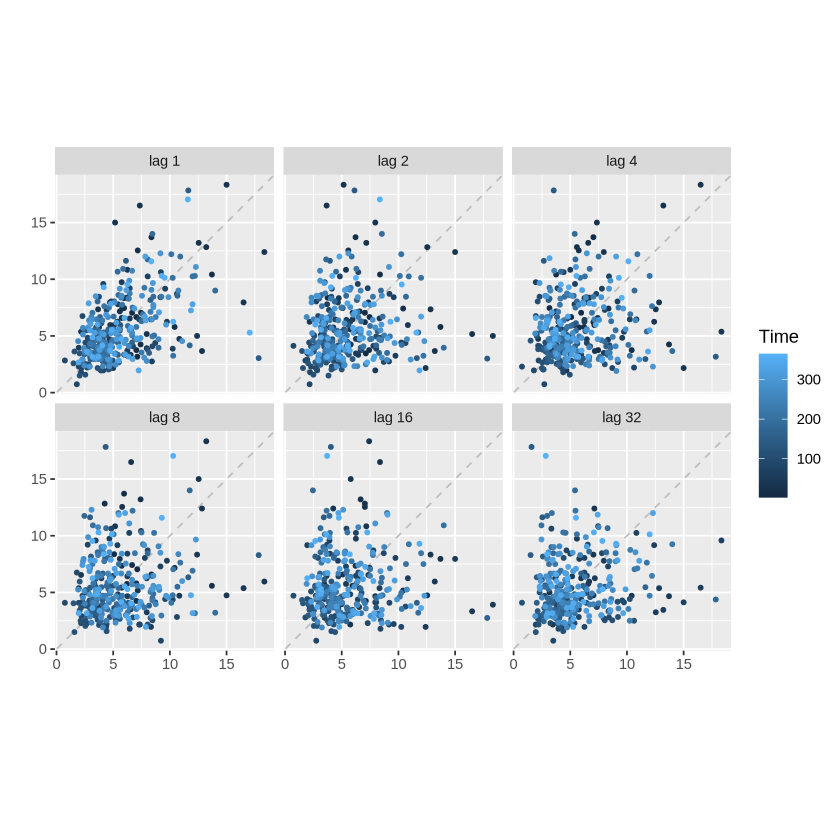

In [114]:
# Documentation: https://pkg.robjhyndman.com/forecast/reference/gglagplot.html
gglagplot(
    df_pm_pivot$pm2_5,
    set.lags=c(1, 2, 4, 8, 16, 32),
    do.lines=FALSE
)

### 9.5 Resampling a timeseries 
In time series analysis you'll often be faced with data sampled at different scales (hourly, daily, weekly, etc.). Resampling is a method of __upscaling__ or __downscaling__ timeseries data.
* __upscaling__ - Make more datapoints by moving to a finer-scale sample (days -> hours). New data can be imputed or left as NaNs.
* __downscaling__ - Reduce datapoints by moving to a coaser-scale sample (hours -> days). Requires an aggregation metric like mean or sum.
  
Take a look at the [`rsample` package documentation](https://www.tidyverse.org/blog/2022/08/rsample-1-1-0/)!

In [ ]:
# Challenge (use `df_pm_pivot`
# Downscale from daily to monthly means using Month Start (MS) 
# Downscale from daily to 7-day 

In [ ]:
# Downscale from daily to monthly means using Month Start (MS) 
df_pm.resample('MS').mean()

In [ ]:
# Downscale from daily to 7-day 
df_pm.resample('7D').max().head()

In [ ]:
# Upscale from daily to 12-hour, no fill 
df_pm.resample('12h').asfreq().head(6)

In [ ]:
# Upscale from daily to 12-hour, with forward-fill
df_pm.resample('12h').asfreq().ffill().head()